# Modelo Calculador Rutas Transmilenio

_Updated: January 2023_

## Data understanding

### Import libraries

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

### Load data

In [40]:
cols = ['Acceso_Estacion', 'Day_Group_Type', 'Dispositivo', 'Emisor', 'Estacion_Parada', 'Fase', 'Fecha_Clearing', 'Fecha_Transaccion', 'Hora_Pico_SN', 'ID_Vehiculo', 'Linea', 'Nombre_Perfil', 'Numero_Tarjeta', 'Operador', 'Ruta', 'Saldo_Despues_Transaccion', 'Saldo_Previo_a_Transaccion', 'Sistema', 'Tipo_Tarifa', 'Tipo_Tarjeta', 'Tipo_Vehiculo', 'Valor', 'archivo']
# data = pd.read_csv('./Datos/validacionTroncal20231129.csv', sep=',', names=cols, header=0, encoding='latin-1')

directorio = './Datos/'
data_frames = []

# Upload data to a dataframe
for filename in os.listdir(directorio):
    if filename.endswith(".csv"):
        filepath = os.path.join(directorio, filename)
        df = pd.read_csv(filepath, sep=',', names=cols, header=0, encoding='latin-1')
        data_frames.append(df)

# Concatenar todos los DataFrames en uno solo
data = pd.concat(data_frames, ignore_index=True)

print(data.shape)
data.head()

(46566982, 23)


,Acceso_Estacion,Day_Group_Type,Dispositivo,Emisor,Estacion_Parada,Fase,Fecha_Clearing,Fecha_Transaccion,Hora_Pico_SN,ID_Vehiculo,...,Operador,Ruta,Saldo_Despues_Transaccion,Saldo_Previo_a_Transaccion,Sistema,Tipo_Tarifa,Tipo_Tarjeta,Tipo_Vehiculo,Valor,archivo
0,(KA) ALIMENTACION K.CENTRAL. HOSPITAL. CORABA...,Dia 1,10000775,(3101000) Bogota Card(Citizen),(05100) Banderas P. Central,Fase 3,2023-11-29,2023-11-29 03:50:05,Peak Time,NaN,...,(201) Trunk agency,NaN,5650.0,8600.0,TRONCAL,1,tullave Plus,NaN,2950.0,Validacion_Troncal_20231129.zip
1,(KA) ALIMENTACION K.CENTRAL. HOSPITAL. CORABA...,Dia 1,10000776,(3101000) Bogota Card(Citizen),(05100) Banderas P. Central,Fase 3,2023-11-29,2023-11-29 03:50:05,Peak Time,NaN,...,(201) Trunk agency,NaN,6750.0,9700.0,TRONCAL,1,tullave Plus,NaN,2950.0,Validacion_Troncal_20231129.zip
2,(KA) ALIMENTACION K.CENTRAL. HOSPITAL. CORABA...,Dia 1,10000774,(3101000) Bogota Card(Citizen),(05100) Banderas P. Central,Fase 3,2023-11-29,2023-11-29 03:50:12,Peak Time,NaN,...,(201) Trunk agency,NaN,1300.0,4250.0,TRONCAL,1,tullave Plus,NaN,2950.0,Validacion_Troncal_20231129.zip
3,(23) Acceso Peatonal,Dia 1,10000923,(3101000) Bogota Card(Citizen),(05000) Portal AmÃ©ricas,Fase 3,2023-11-29,2023-11-29 03:50:15,Peak Time,NaN,...,(201) Trunk agency,NaN,3850.0,6800.0,TRONCAL,1,tullave Plus,NaN,2950.0,Validacion_Troncal_20231129.zip
4,(23) Acceso Peatonal,Dia 1,10000922,(3101000) Bogota Card(Citizen),(05000) Portal AmÃ©ricas,Fase 3,2023-11-29,2023-11-29 03:50:16,Peak Time,NaN,...,(201) Trunk agency,NaN,32700.0,35650.0,TRONCAL,1,tullave Plus,NaN,2950.0,Validacion_Troncal_20231129.zip


### Verify data types

In [41]:
data.dtypes

Acceso_Estacion                object
Day_Group_Type                 object
Dispositivo                     int64
Emisor                         object
Estacion_Parada                object
Fase                           object
Fecha_Clearing                 object
Fecha_Transaccion              object
Hora_Pico_SN                   object
ID_Vehiculo                   float64
Linea                          object
Nombre_Perfil                  object
Numero_Tarjeta                 object
Operador                       object
Ruta                          float64
Saldo_Despues_Transaccion     float64
Saldo_Previo_a_Transaccion    float64
Sistema                        object
Tipo_Tarifa                     int64
Tipo_Tarjeta                   object
Tipo_Vehiculo                 float64
Valor                         float64
archivo                        object
dtype: object

### Count unique values for each variable

In [42]:
data.nunique()

Acceso_Estacion                   429
Day_Group_Type                      3
Dispositivo                      1517
Emisor                              9
Estacion_Parada                   159
Fase                                1
Fecha_Clearing                     29
Fecha_Transaccion             1989767
Hora_Pico_SN                        2
ID_Vehiculo                         0
Linea                              13
Nombre_Perfil                       8
Numero_Tarjeta                4668906
Operador                            1
Ruta                                0
Saldo_Despues_Transaccion       29874
Saldo_Previo_a_Transaccion      30460
Sistema                             1
Tipo_Tarifa                         1
Tipo_Tarjeta                        2
Tipo_Vehiculo                       0
Valor                               4
archivo                            29
dtype: int64

In [43]:
# print(data['Estacion_Parada'].unique().tolist())
# print(data['Fecha_Transaccion'].unique().tolist())
print(data['Hora_Pico_SN'].unique().tolist())
print(data['Sistema'].unique().tolist())

['Peak Time', 'N']
['TRONCAL']


### Data transformation

In [44]:
datacc = data
datacc = datacc.drop(['Acceso_Estacion', 'Day_Group_Type', 'Dispositivo', 'Emisor', 'Fase', 'Fecha_Clearing', 'Hora_Pico_SN', 'ID_Vehiculo', 'Linea', 'Nombre_Perfil', 'Numero_Tarjeta', 'Operador', 'Ruta', 'Saldo_Despues_Transaccion', 'Saldo_Previo_a_Transaccion', 'Sistema', 'Tipo_Tarifa', 'Tipo_Tarjeta', 'Tipo_Vehiculo', 'Valor', 'archivo'], axis=1)
datacc.shape

(46566982, 2)

In [45]:
# datacc = pd.get_dummies(datacc, columns=['Estacion_Parada'])
datacc.head()

,Estacion_Parada,Fecha_Transaccion
0,(05100) Banderas P. Central,2023-11-29 03:50:05
1,(05100) Banderas P. Central,2023-11-29 03:50:05
2,(05100) Banderas P. Central,2023-11-29 03:50:12
3,(05000) Portal AmÃ©ricas,2023-11-29 03:50:15
4,(05000) Portal AmÃ©ricas,2023-11-29 03:50:16


#### Verify data types

In [46]:
datacc.dtypes

Estacion_Parada      object
Fecha_Transaccion    object
dtype: object

#### Transform data

In [47]:
# Get each station code
datacc['Estacion_Parada'] = datacc['Estacion_Parada'].str.extract(r'\((\d+)\)')
datacc['Estacion_Parada'] = pd.to_numeric(datacc['Estacion_Parada'], errors='coerce')

# Transform  to right datetime format
datacc['Fecha_Transaccion'] = pd.to_datetime(datacc['Fecha_Transaccion'])

# Create new columns
datacc['Ano'] = datacc['Fecha_Transaccion'].dt.year.astype(int)
datacc['Mes'] = datacc['Fecha_Transaccion'].dt.month.astype(int)
datacc['Dia'] = datacc['Fecha_Transaccion'].dt.day.astype(int)
datacc['Hora'] = datacc['Fecha_Transaccion'].dt.hour.astype(int)
datacc['Minuto'] = datacc['Fecha_Transaccion'].dt.minute.astype(int)
datacc['Segundo'] = datacc['Fecha_Transaccion'].dt.second.astype(int)

datacc.dtypes

Estacion_Parada               int64
Fecha_Transaccion    datetime64[ns]
Ano                           int32
Mes                           int32
Dia                           int32
Hora                          int32
Minuto                        int32
Segundo                       int32
dtype: object

### Group Data

In [48]:
# Create date range (per hour)
rango_horas = range(0, 25, 1)  # from 0:00 to 23:59

# Add column 'Rango_Hora'
datacc['Rango_Hora'] = pd.cut(datacc['Hora'], bins=rango_horas, right=False)

# Grouping data by range
datagrouped = datacc.groupby(['Estacion_Parada', 'Ano', 'Mes', 'Dia', 'Hora', 'Rango_Hora']).size().reset_index(name='Conteo')

# Deleting ranges with zero count
datagrouped = datagrouped[datagrouped['Conteo'] != 0]

# Showing results
print(datagrouped)

C:\Users\wmachuca\AppData\Local\Temp\ipykernel_20892\3441486453.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  datagrouped = datacc.groupby(['Estacion_Parada', 'Ano', 'Mes', 'Dia', 'Hora', 'Rango_Hora']).size().reset_index(name='Conteo')


         Estacion_Parada   Ano  Mes  Dia  Hora Rango_Hora  Conteo
14308               2000  2023   11   29     4     [4, 5)     637
14333               2000  2023   11   29     5     [5, 6)    4486
14358               2000  2023   11   29     6     [6, 7)    9583
14383               2000  2023   11   29     7     [7, 8)    9935
14408               2000  2023   11   29     8     [8, 9)    6650
...                  ...   ...  ...  ...   ...        ...     ...
5004786            57503  2023   12   30    18   [18, 19)     187
5004811            57503  2023   12   30    19   [19, 20)      94
5004836            57503  2023   12   30    20   [20, 21)      81
5004861            57503  2023   12   30    21   [21, 22)      28
5004886            57503  2023   12   30    22   [22, 23)       3

[88666 rows x 7 columns]


## Data Exploration

In [49]:
# Descriptive statistics
datagrouped.describe()

,Estacion_Parada,Ano,Mes,Dia,Hora,Conteo
count,88666.000000,88666.0,88666.000000,88666.000000,88666.000000,88666.000000
mean,8079.520312,2023.0,11.930966,16.256964,13.226276,525.195475
std,8129.312607,0.0,0.253514,8.910970,5.748775,947.032407
min,2000.000000,2023.0,11.000000,1.000000,0.000000,1.000000
25%,4102.000000,2023.0,12.000000,9.000000,8.000000,83.000000
50%,7008.000000,2023.0,12.000000,16.000000,13.000000,237.000000
75%,9110.000000,2023.0,12.000000,23.000000,18.000000,545.000000
max,57503.000000,2023.0,12.000000,31.000000,23.000000,15131.000000


#### Histograms

<Axes: xlabel='Fecha_Transaccion', ylabel='Count'>

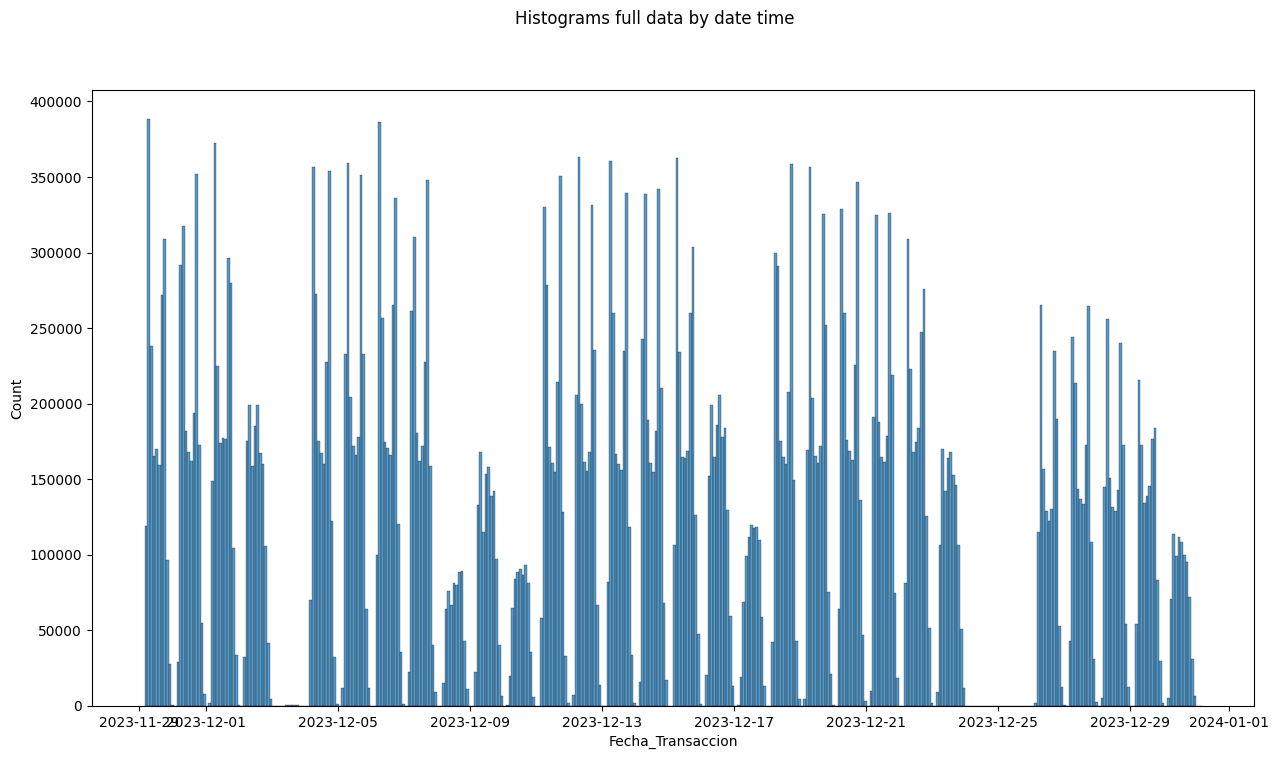

In [50]:
# Histograms full data by date time
fig, ((ax1)) = plt.subplots(1, 1, figsize=(15,8))
fig.suptitle('Histograms full data by date time')
sns.histplot(datacc['Fecha_Transaccion'], ax=ax1)

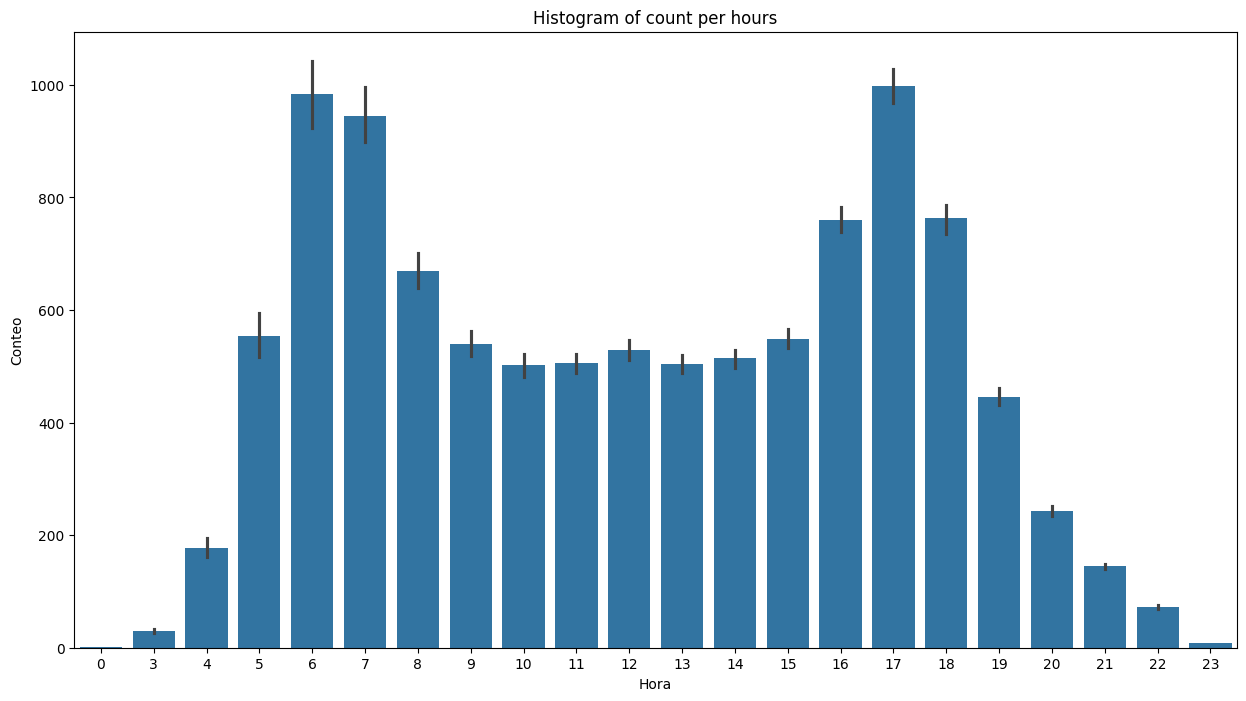

In [51]:
# Histograms count by range
plt.figure(figsize=(15, 8))
sns.barplot(x='Hora', y='Conteo', data=datagrouped)
plt.title('Histogram of count per hours')
plt.xlabel('Hora')
plt.ylabel('Conteo')
plt.show()

### EDA (Exploratory Data Analysis)

In [52]:
X = datagrouped[['Estacion_Parada', 'Ano', 'Mes', 'Dia', 'Hora', 'Conteo']].copy()
print(X.shape)

Y=pd.DataFrame()
Y = datagrouped['Conteo']
print(Y.shape)
print(X)

(88666, 6)
(88666,)
         Estacion_Parada   Ano  Mes  Dia  Hora  Conteo
14308               2000  2023   11   29     4     637
14333               2000  2023   11   29     5    4486
14358               2000  2023   11   29     6    9583
14383               2000  2023   11   29     7    9935
14408               2000  2023   11   29     8    6650
...                  ...   ...  ...  ...   ...     ...
5004786            57503  2023   12   30    18     187
5004811            57503  2023   12   30    19      94
5004836            57503  2023   12   30    20      81
5004861            57503  2023   12   30    21      28
5004886            57503  2023   12   30    22       3

[88666 rows x 6 columns]


#### Correlations

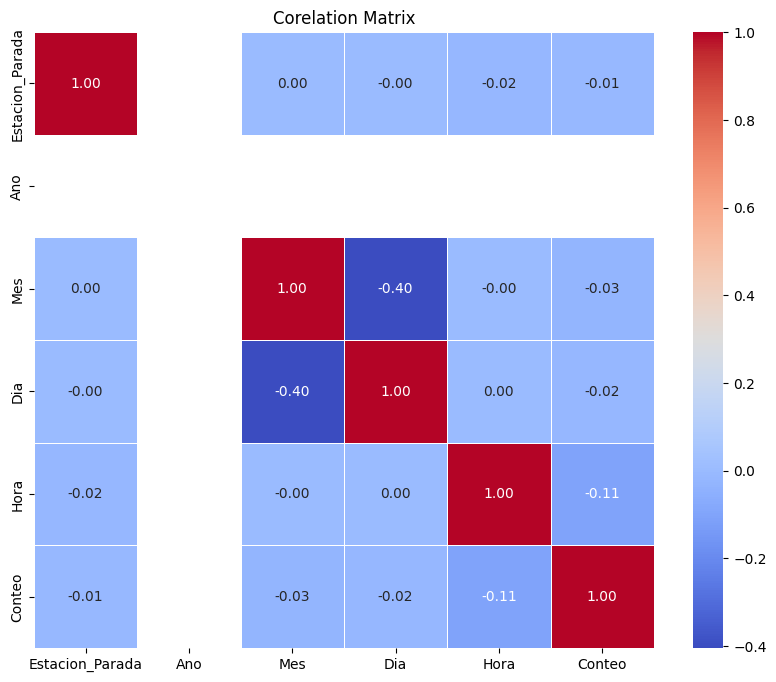

In [53]:
# Calculate correlation matrix
correlation_matrix = X.corr()

# Create a heatmap from the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Corelation Matrix')
plt.show()

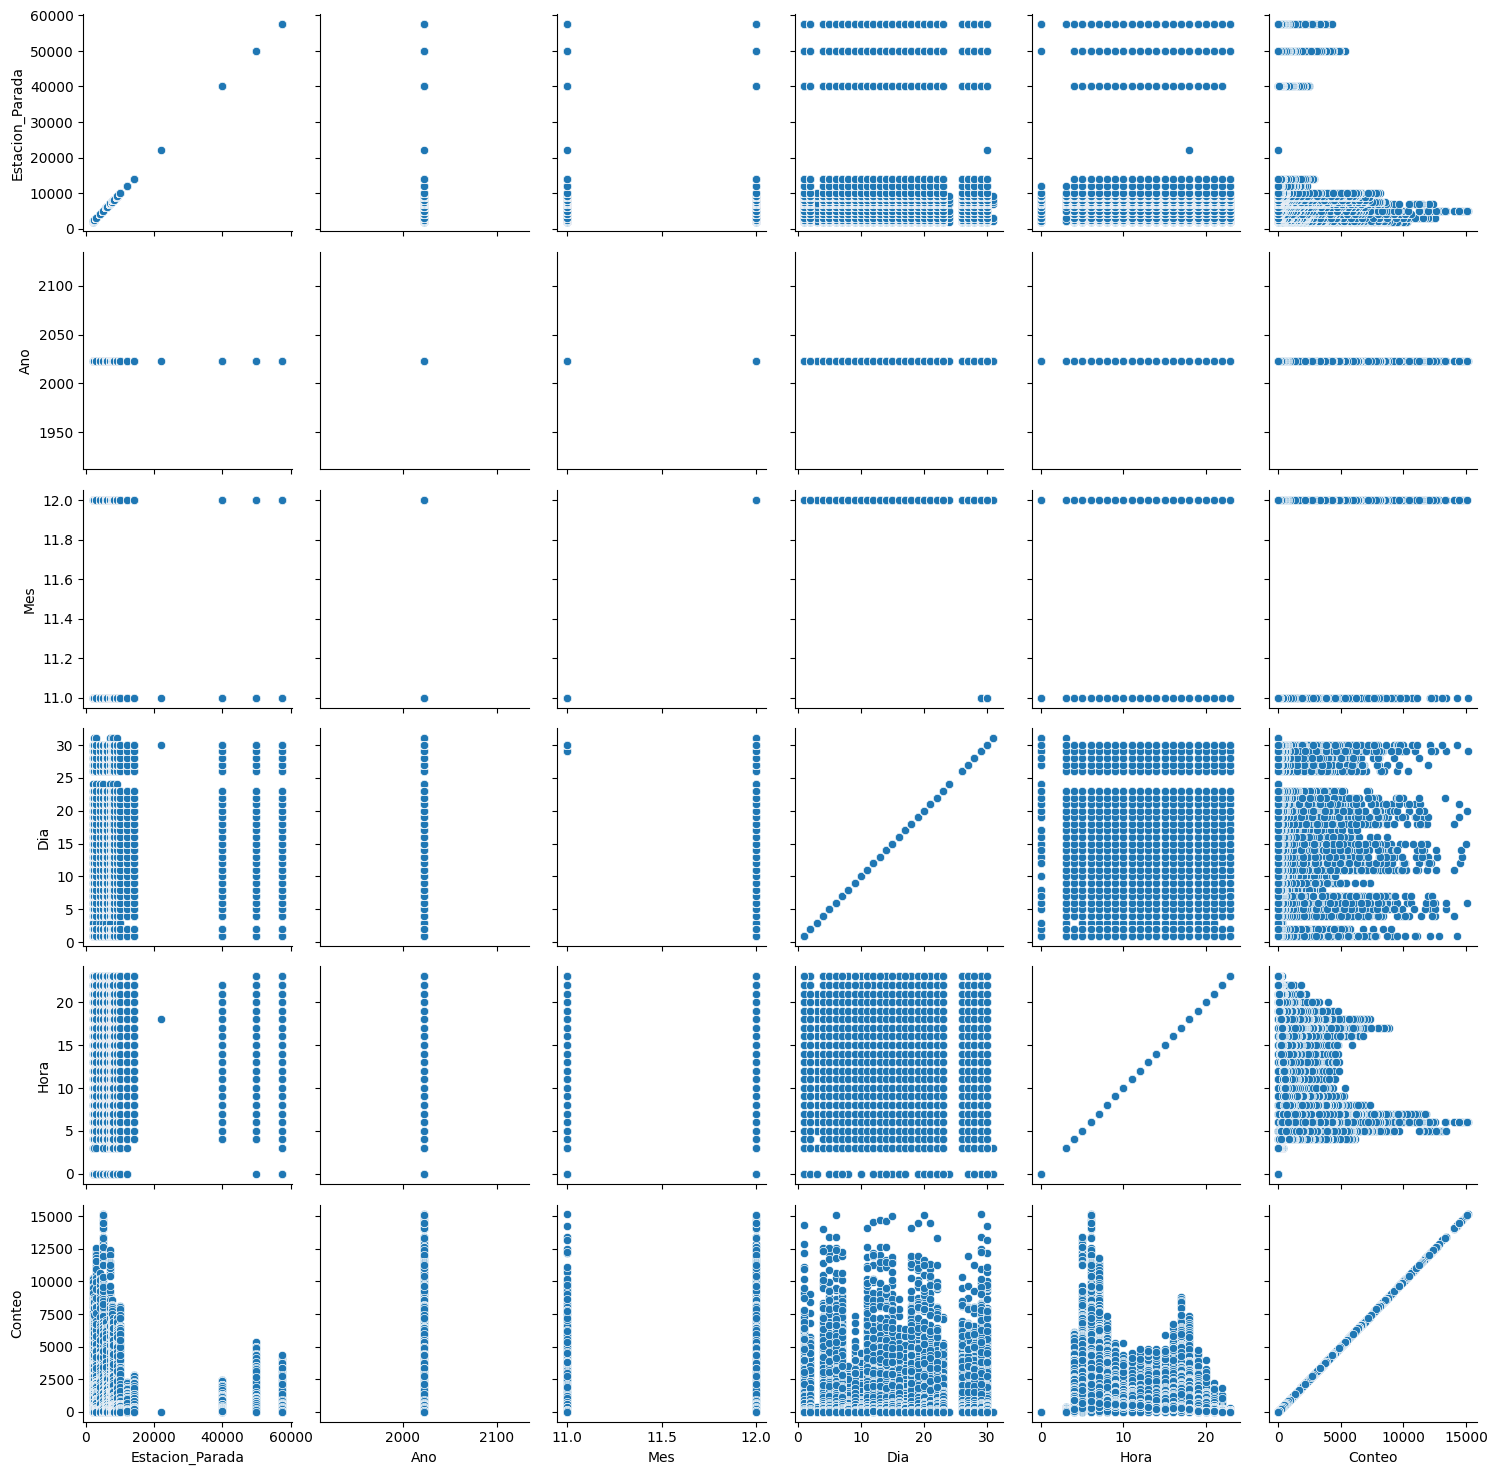

In [54]:
g = sns.PairGrid(X)
g.map(sns.scatterplot)

## Modeling: machine learning

### Libraries

In [80]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split as split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as MSE, r2_score
from sklearn.metrics import mean_absolute_error as MAE
import joblib

### Data partitioning


In [56]:
# Data set normalization and partitioning
sc = StandardScaler()
Xsc = sc.fit(X)
Xt = Xsc.transform(X)
Xt.shape

(88666, 6)

In [84]:
X_train, X_test, Y_train, Y_test = split(Xt, Y, test_size=0.30, random_state=42)

### Models

#### Multivariate Lineal Regression

In [58]:
# Define model and prediction
ols = LinearRegression()
LinearRegressionModel = ols.fit(X_train, Y_train)
Y_pred1 = LinearRegressionModel.predict(X_test)

In [59]:
# Accuracy check
mse = MSE(Y_test, Y_pred1)
rmse = MSE(Y_test, Y_pred1, squared=False)
mae = MAE(Y_test, Y_pred1)
r2 = r2_score(Y_test, Y_pred1)
print("MSE: %.2f" % mse)
print("RMSE: %.2f" % rmse)
print("MAE: %.2f" % mae)
print("R2: %.2f" % r2)

# TODO: Veryfy results, why the prediction is perfect for lineal regression?

MSE: 0.00
RMSE: 0.00
MAE: 0.00
R2: 1.00


c:\Users\wmachuca\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


#### Light GBM
https://www.analyticsvidhya.com/blog/2021/08/complete-guide-on-how-to-use-lightgbm-in-python/   
https://www.datatechnotes.com/2022/03/lightgbm-regression-example-in-python.html  

In [60]:
import lightgbm as lgb

In [61]:
# Hyperparameters
params = {
    'task': 'train',
    'boosting': 'gbdt',
    'objective': 'regression',
    'num_leaves': 10,
    'learning_rate': 0.05,
    'metric': {'l2','l1'},
    'header' : 'true',
    'verbose': 0
}

# Laoding data
lgb_train = lgb.Dataset(X_train, Y_train)
lgb_eval = lgb.Dataset(X_test, Y_test, reference=lgb_train)

# Fitting the model
LightGBMModel = lgb.train(params, train_set=lgb_train, valid_sets=lgb_eval)

# Pred
Y_pred2 = LightGBMModel.predict(X_test)

In [62]:
# Accuracy check
mse = MSE(Y_test, Y_pred2)
rmse = MSE(Y_test, Y_pred2, squared=False)
mae = MAE(Y_test, Y_pred2)
r2 = r2_score(Y_test, Y_pred2)
print("MSE: %.2f" % mse)
print("RMSE: %.2f" % rmse)
print("MAE: %.2f" % mae)
print("R2: %.2f" % r2)

MSE: 8836.80
RMSE: 94.00
MAE: 13.75
R2: 0.99


c:\Users\wmachuca\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


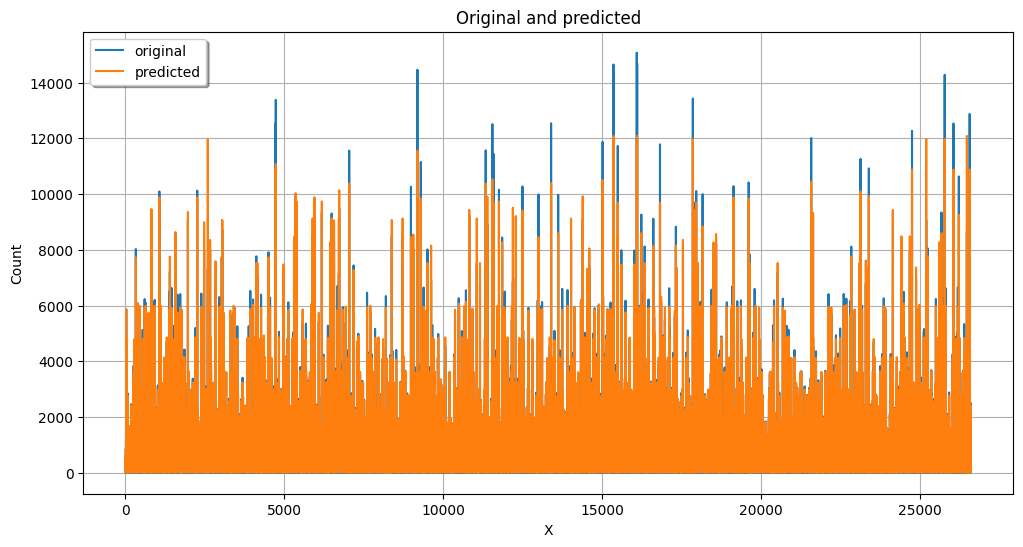

In [63]:
# Visualizing in a plot
x_ax = range(len(Y_test))
plt.figure(figsize=(12, 6))
plt.plot(x_ax, Y_test, label="original")
plt.plot(x_ax, Y_pred2, label="predicted")
plt.title("Original and predicted")
plt.xlabel('X')
plt.ylabel('Count')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show()

<Axes: title={'center': 'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

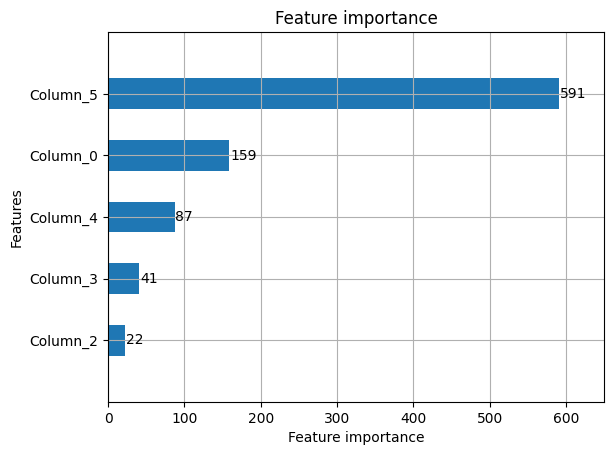

In [64]:
# Plotting feature importance
lgb.plot_importance(LightGBMModel, height=.5)

<Axes: >

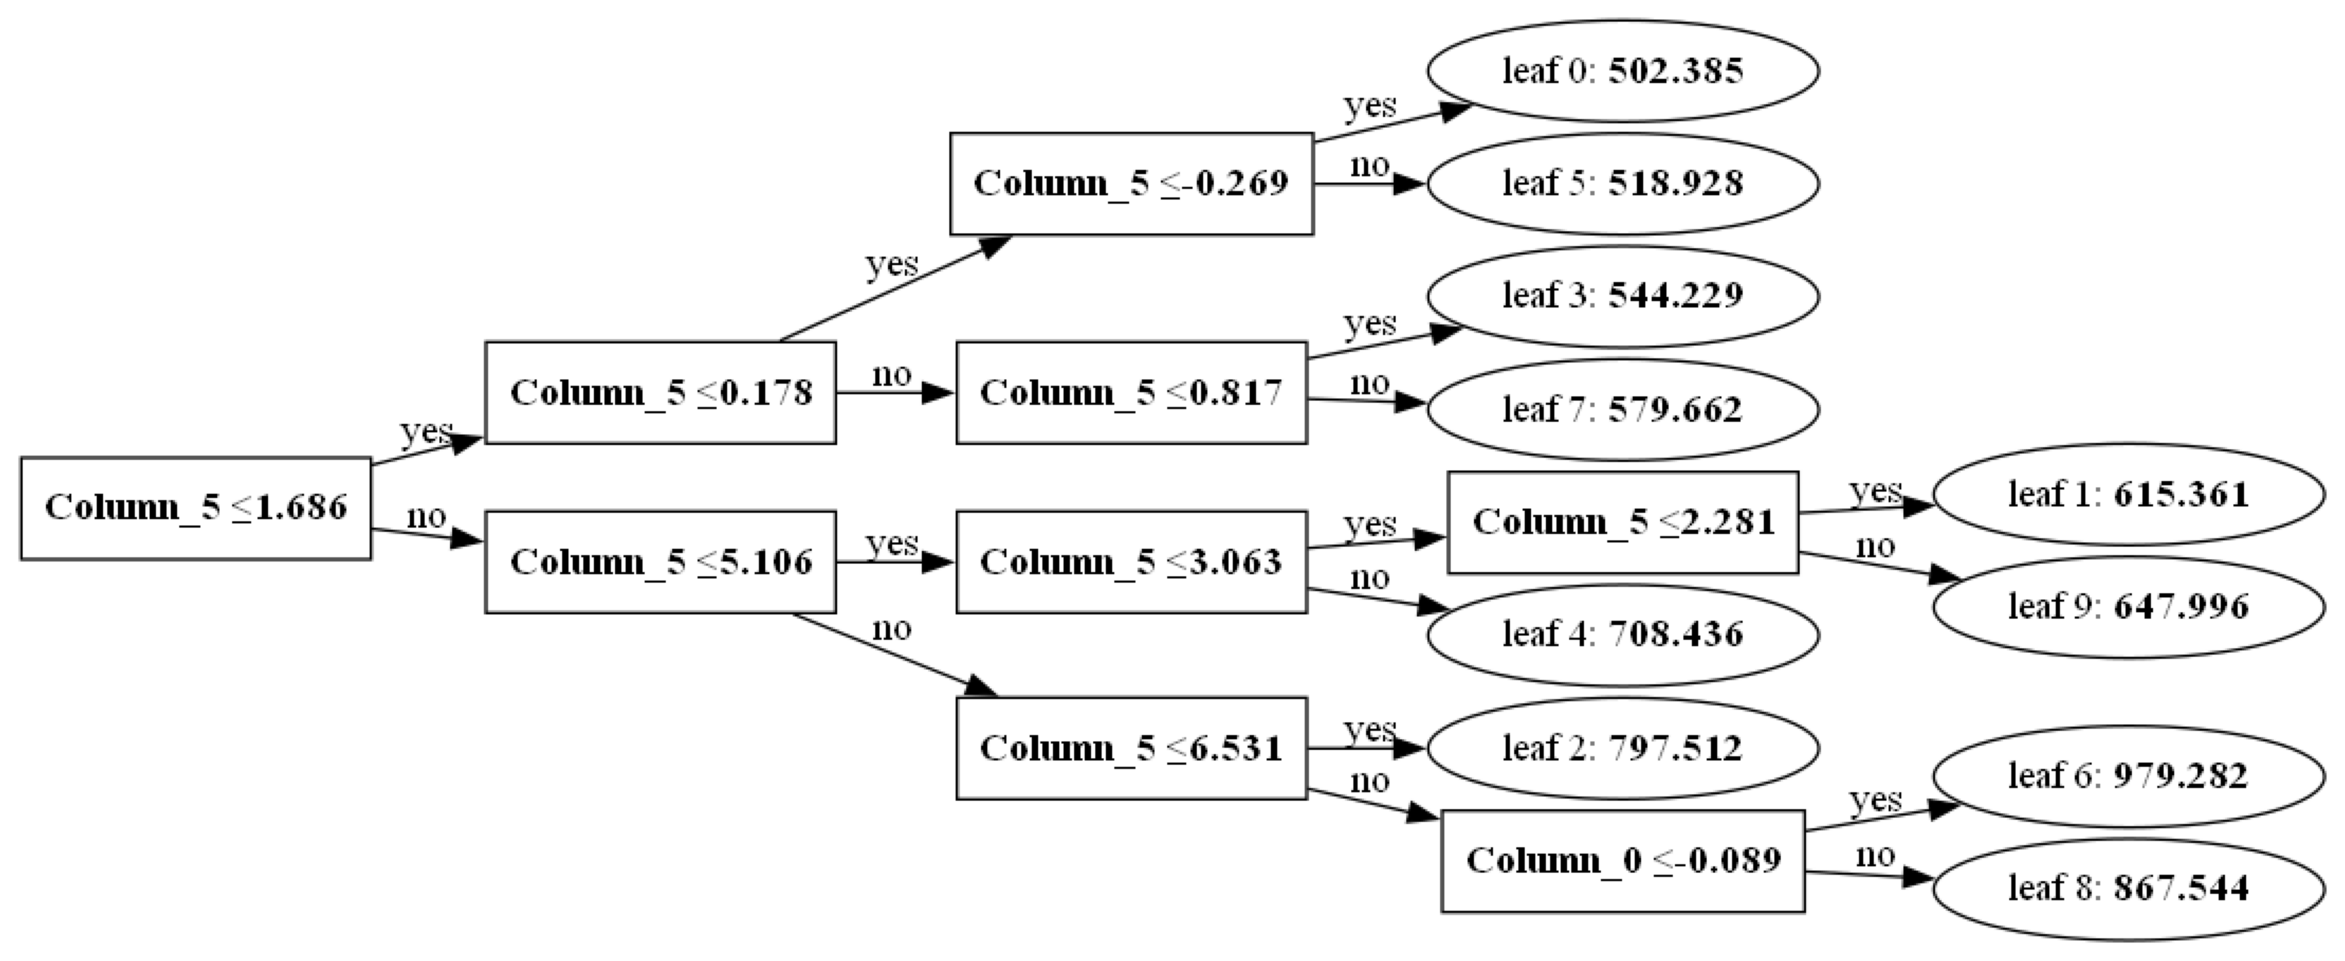

In [65]:
lgb.plot_tree(LightGBMModel, figsize=(30,40))

#### Random Forest Regressor

In [66]:
from sklearn.ensemble import RandomForestRegressor

In [67]:
RandomForestRegressorModel = RandomForestRegressor()
RandomForestRegressorModel.fit(X_train, Y_train)
y_pred3 = RandomForestRegressorModel.predict(X_test)

In [69]:
# Accuracy check
mse = MSE(Y_test, y_pred3)
rmse = MSE(Y_test, y_pred3, squared=False)
mae = MAE(Y_test, y_pred3)
r2 = r2_score(Y_test, y_pred3)
print("MSE: %.2f" % mse)
print("RMSE: %.2f" % rmse)
print("MAE: %.2f" % mae)
print("R2: %.2f" % r2)

MSE: 7.09
RMSE: 2.66
MAE: 0.15
R2: 1.00


c:\Users\wmachuca\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


#### Xgboost Regressor
https://www.datatechnotes.com/2019/06/regression-example-with-xgbregressor-in.html

In [70]:
from sklearn.model_selection import cross_val_score, KFold
import xgboost as xgb
from sklearn.metrics import classification_report

In [71]:
#Define model
XgBoostRegressorModel = xgb.XGBRegressor(objective ='reg:squarederror',
                          booster='gbtree',
                          colsample_bytree = 1,
                          importance_type='gain',
                          learning_rate = 0.2,
                          max_depth = 5,
                          alpha = 5,
                          n_estimators = 200,
                          seed=123)

In [72]:
#Training
XgBoostRegressorModel.fit(X_train, Y_train)

XGBRegressor(alpha=5, base_score=None, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None, colsample_bytree=1,
             device=None, early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=None, grow_policy=None,
             importance_type='gain', interaction_constraints=None,
             learning_rate=0.2, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=200,
             n_jobs=None, num_parallel_tree=None, ...)

In [73]:
#K-fold cross validation
scores = cross_val_score(XgBoostRegressorModel, X_train, Y_train, cv=10)
print("Mean cross-validation score: %.2f" % scores.mean())

Mean cross-validation score: 1.00


In [74]:
kfold = KFold(n_splits=10, shuffle=True)
kf_cv_scores = cross_val_score(XgBoostRegressorModel, X_train, Y_train, cv=kfold )
print("K-fold CV average score: %.2f" % kf_cv_scores.mean())

K-fold CV average score: 1.00


In [75]:
# Pred
y_pred4 = XgBoostRegressorModel.predict(X_test)

In [76]:
# Accuracy check
mse = MSE(Y_test, y_pred4)
rmse = MSE(Y_test, y_pred4, squared=False)
mae = MAE(Y_test, y_pred4)
r2 = r2_score(Y_test, y_pred4)
print("MSE: %.2f" % mse)
print("RMSE: %.2f" % rmse)
print("MAE: %.2f" % mae)
print("R2: %.2f" % r2)

MSE: 5825.66
RMSE: 76.33
MAE: 9.40
R2: 0.99


c:\Users\wmachuca\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


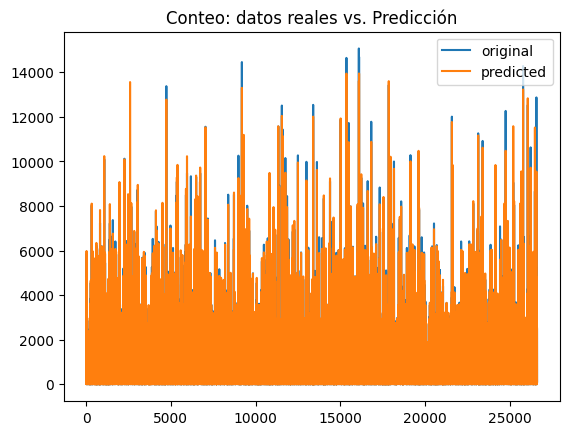

In [77]:
x_ax = range(len(Y_test))
plt.plot(x_ax, Y_test, label="original")
plt.plot(x_ax, y_pred4, label="predicted")
plt.title("Conteo: datos reales vs. Predicción")
plt.legend()
plt.show()

## Export Trained Models

In [82]:
# Light GBM Model
LightGBMModel.save_model('./ModelosEntrenados/LightGBM.txt')

# Random Forest
joblib.dump(RandomForestRegressorModel, './ModelosEntrenados/RandomForestRegressor.pkl')

# Xgboost Regressor
XgBoostRegressorModel.save_model('./ModelosEntrenados/XgBoostRegressor.model')

c:\Users\wmachuca\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:160: UserWarning: [19:19:09] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\c_api\c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.
  warnings.warn(smsg, UserWarning)


## References

https://github.com/kiteco/kite-python-blog-post-code/blob/master/Web%20Scraping%20Tutorial/script.py

https://medium.com/geekculture/scrappy-guide-to-web-scraping-with-python-475385364381

https://stackoverflow.com/questions/47730671/python-3-using-requests-does-not-get-the-full-content-of-a-web-page